# Data Cleaning in Python

### 📌 What is Data Cleaning?

Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete data within a dataset. It's a critical step in the data science workflow because raw data is often messy and unstructured. The goal is to make the data consistent, reliable, and ready for analysis or modeling.

---

### 🔍 Why It Matters & Common Issues

Dirty data can lead to inaccurate insights, poor model performance, and wrong business decisions. Cleaning the data helps ensure the results of your analysis are trustworthy and meaningful.

**Common data quality issues include:**
- **Missing values:** Empty or null fields that need to be filled or removed  
- **Duplicates:** Repeated rows or entries  
- **Inconsistent formatting:** Variations in dates, text case, or spacing  
- **Incorrect data types:** Numbers stored as strings, or dates as plain text  
- **Outliers:** Values that are abnormally high or low and may skew analysis  
- **Irrelevant data:** Unnecessary columns or rows not useful for the task  

By addressing these, we improve the quality and reliability of our data

In [2]:
import pandas as pd

# read csv file
df = pd.read_csv('train_dataset.csv')
display(type(df))
data=df.copy()

pandas.core.frame.DataFrame

## Dealing with Missing Values

In [ ]:
# Check for missing values in each column
df.isnull().sum()

student_id                        0
age                               0
gender                            4
study_hours_per_day               0
social_media_hours                0
netflix_hours                     5
part_time_job                     0
attendance_percentage            23
sleep_hours                       7
diet_quality                      0
exercise_frequency                0
parental_education_level         94
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

### Fill missing gender with the mode

In [ ]:
# Fill missing gender values with the most frequent one (mode)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [ ]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     5
part_time_job                     0
attendance_percentage            23
sleep_hours                       7
diet_quality                      0
exercise_frequency                0
parental_education_level         94
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

### Fill missing netflix_hours with the median

In [ ]:
# Fill missing netflix_hours with the median value
df['netflix_hours'] = df['netflix_hours'].fillna(df['netflix_hours'].median())

In [ ]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage            23
sleep_hours                       7
diet_quality                      0
exercise_frequency                0
parental_education_level         94
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

### Drop rows where sleep_hours is missing

In [ ]:
# Drop rows with missing sleep_hours
df = df.dropna(subset=['sleep_hours'])

### Drop the parental_education_level column

In [ ]:
# Drop the parental_education_level column entirely
df = df.drop(columns=['parental_education_level'])
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

### fill missing values in attendance_percentage by the mean within each gender group

In [ ]:
df['attendance_percentage'] = df.groupby('gender')['attendance_percentage'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Check for missing values in each column
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

## Dealing with Duplicates

In [ ]:
df.duplicated().sum()

np.int64(4)

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Optionally, display the duplicate rows
df[df.duplicated()]

Number of duplicate rows: 4


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
4,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3
5,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8
193,S1189,22,Male,3.2,2.0,1.6,No,78.2,5.6,Fair,2,Average,7,Yes,60.5
194,S1190,23,Male,1.7,3.8,1.2,No,82.3,7.9,Poor,6,Good,5,No,55.4


### Remove Entire Duplicate Rows

In [ ]:
# Remove fully duplicated rows
df = df.drop_duplicates()
print("Shape after removing full duplicates:", df.shape)

Shape after removing full duplicates: (993, 15)


### Remove Duplicates Based on Unique ID (student_id)

In [ ]:
# Remove duplicate entries based on student_id, keeping the first occurrence
df = df.drop_duplicates(subset=['student_id'], keep='first')   # keep='last', False
print("Shape after removing duplicates by student_id:", df.shape) #////////////

Shape after removing duplicates by student_id: (989, 15)


## Deaking with Inconsistent Formatting

### Check for inconsistent text case or whitespace

In [3]:
# Example: Checking for inconsistent gender values
print("Unique gender values before cleaning:")
print(df['gender'].unique())

Unique gender values before cleaning:


KeyError: 'gender'

In [ ]:
df["gender"].value_counts()

gender
Female       474
Male         470
Other         42
male           2
FemalE         2
Male           1
Female         1
   Female      1
Name: count, dtype: int64

In [ ]:

df['gender'] = df['gender'].str.strip().str.capitalize()

df['gender'] = df['gender'].replace({
    'FemalE': 'Female',
    'Male': 'Male',
    'Other': 'Other'
})


In [ ]:
df["gender"].value_counts()

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0
6,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4
7,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Average,4,No,100.0
8,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Poor,4,No,89.8


In [ ]:
# Strip whitespace and convert to consistent case (optional for cleaning later)
df['gender'] = df['gender'].str.strip().str.lower()

In [ ]:
# Example: Checking for inconsistent gender values
print("Unique gender values before cleaning:")
print(df['gender'].unique())

Unique gender values before cleaning:
['Female' 'Male' 'Other']


### Check for inconsistent date formats (if applicable)

In [ ]:
df['gender'].dtype

price -> $1,000

dtype('O')

In [ ]:
# Example: If there's a column like 'birth_date', check its format
if 'birth_date' in df.columns:
    print("Sample date values:")
    print(df['birth_date'].head())
    print("Data type:", df['birth_date'].dtype)

In [ ]:
# df['birth_date'] = pd.to_datetime(df['birth_date'], format='%Y-%m-%d %h-%M-%s')

### Check for numbers stored as strings

In [ ]:
# Example: Check for numeric-looking columns that are stored as object (string)
print("Columns with object dtype that may be numeric:")
print(df.select_dtypes(include='object').columns)

Columns with object dtype that may be numeric:
Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'internet_quality', 'extracurricular_participation'],
      dtype='object')


In [ ]:
# Optionally display a sample to check
df.select_dtypes(include='object').head()

,student_id,gender,part_time_job,diet_quality,internet_quality,extracurricular_participation
0,S1000,Female,No,Fair,Average,Yes
1,S1001,Female,No,Good,Average,No
2,S1002,Male,No,Poor,Poor,No
3,S1003,Female,No,Poor,Good,Yes
6,S1004,Female,No,Fair,Good,No


In [ ]:
# Example: Check for numeric-looking columns that are stored as object (string)
print("Columns with object dtype that may be numeric:")
print(df.select_dtypes(include='number').columns)
df.select_dtypes(include='number').head()

Columns with object dtype that may be numeric:
Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8
6,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4


In [ ]:
# Remove dollar sign ($) and commas, then convert to numeric
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df.dtypes

## Dealing with Outlier Detection

### Detect Outliers Using IQR (Interquartile Range Method)

In [ ]:
# Example: Detecting outliers in 'exam_score' column using IQR
Q1 = df['exam_score'].quantile(0.25)
Q3 = df['exam_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['exam_score'] < lower_bound) | (df['exam_score'] > upper_bound)]
print(f"Number of outliers in 'exam_score' using IQR: {len(outliers_iqr)}")

Number of outliers in 'exam_score' using IQR: 2


### Detect Outliers Using Z-Score

In [ ]:
# Detecting outliers using Z-score
from scipy.stats import zscore

# Compute Z-scores for 'exam_score'
z_scores = zscore(df['exam_score'])
outliers_z = df[(z_scores > 3) | (z_scores < -3)]

# Output the rows with outliers
print("Rows with outliers detected using Z-score:")
display(outliers_z)

Rows with outliers detected using Z-score:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
269,S1265,18,Female,0.6,3.1,3.0,No,79.9,5.2,Good,1,Good,4,No,18.4


### Boxplot Visualization for Outliers

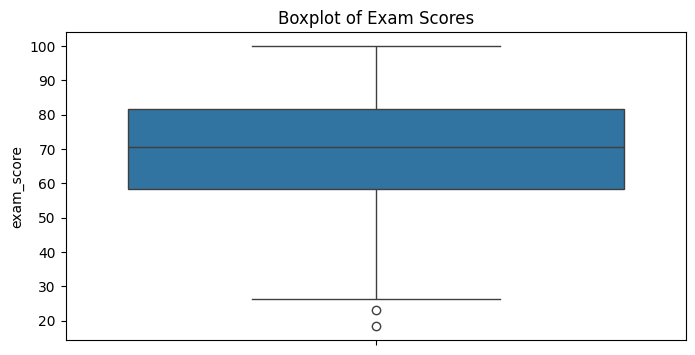

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize 'exam_score' outliers using a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['exam_score'])
plt.title("Boxplot of Exam Scores")
plt.show()

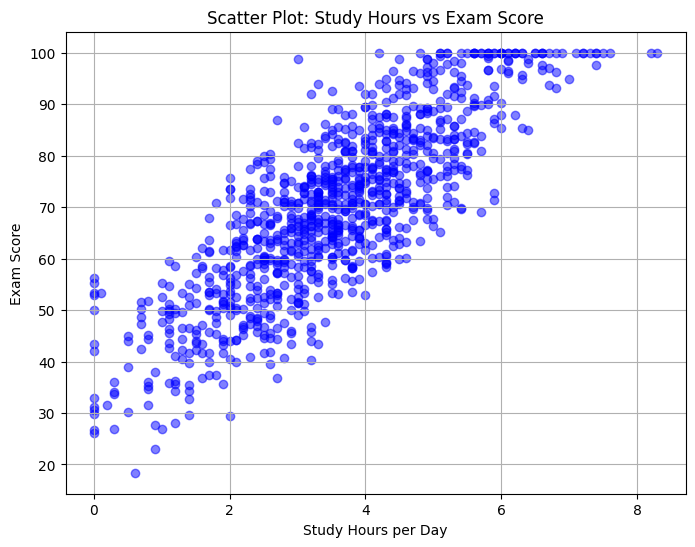

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between 'study_hours_per_day' and 'exam_score'
plt.figure(figsize=(8, 6))
plt.scatter(df['study_hours_per_day'], df['exam_score'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.grid(True)

# Display the plot
plt.show()

## Remove Outliers
- When outliers are errors or clearly incorrect, it’s often appropriate to remove them. Here’s an example of removing outliers based on the Interquartile Range (IQR)

In [ ]:
# Calculate IQR for 'exam_score'
Q1 = df['exam_score'].quantile(0.25)
Q3 = df['exam_score'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'exam_score'
df_no_outliers = df[(df['exam_score'] >= lower_bound) & (df['exam_score'] <= upper_bound)]

# Display the updated DataFrame without outliers
df_no_outliers.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0
6,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4
7,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Average,4,No,100.0
8,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Poor,4,No,89.8


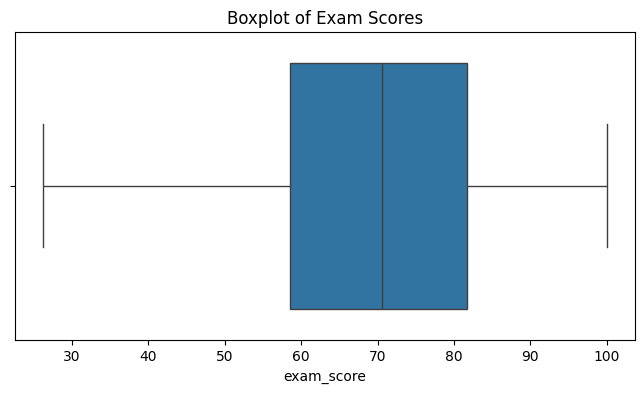

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize 'exam_score' outliers using a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_no_outliers['exam_score'])
plt.title("Boxplot of Exam Scores")
plt.show()

### Cap (Winsorize) Outliers
- Winsorizing outliers involves limiting extreme values to a certain threshold instead of removing them entirely. Here's how you can cap outliers

In [ ]:
from scipy.stats import mstats

# Cap 'exam_score' values at the 5th and 95th percentile
df['exam_score'] = mstats.winsorize(df['exam_score'], limits=[0.05, 0.95])
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,41.7
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,41.7
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,41.7
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,41.7
6,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,41.7
1000,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,41.7
1001,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,41.7
1002,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,41.7


### Scale Outliers Using Log Transformation
- Scaling outliers can help reduce their effect. One common approach is using a log transformation

In [ ]:
import numpy as np

# Apply log transformation to 'exam_score' (ensure all values are positive)
df['exam_score_log'] = np.log1p(df['exam_score'])

df[['exam_score', 'exam_score_log']]

,exam_score,exam_score_log
0,56.2,4.046554
1,100.0,4.615121
6,66.4,4.210645
7,100.0,4.615121
8,89.8,4.508659
...,...,...
999,76.1,4.345103
1000,65.9,4.203199
1001,64.4,4.180522
1002,69.7,4.258446


## Check Data Types of Columns

In [ ]:
# Check the data types of each column
df.dtypes

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
exam_score_log                   float64
dtype: object

### Convert Column to Numeric

In [ ]:
# Convert 'attendance_percentage' to numeric (float)
df['attendance_percentage'] = pd.to_numeric(df['attendance_percentage'], errors='coerce')
df['attendance_percentage'].dtype

dtype('float64')

### Convert Column to Datetime

In [ ]:
# Assuming there's a 'date_column' with date information in string format
df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')
df['date_column'].dtype

### Convert Column to Object (String)
- If a column needs to be converted to a string or object type, use the astype() method. This is useful when numeric or datetime values need to be treated as categorical or text data

In [ ]:
# Convert 'gender' to object (string)
df['gender'] = df['gender'].astype('object')
df['gender'].dtype

dtype('O')

### Convert Column to Boolean
- To convert a column with binary categorical data (e.g., "Yes" or "No") to a boolean type, you can use map() or replace()

In [ ]:
# Convert 'part_time_job' to boolean (Yes -> True, No -> False)
df['part_time_job_bool'] = df['part_time_job'].map({'Yes': True, 'No': False})
df['part_time_job_bool'].dtype

dtype('bool')

### Convert Currency-Like Strings to Numeric

In [ ]:
# Remove dollar sign ($) and commas, then convert to numeric
df['exam_score'] = df['exam_score'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['exam_score'].dtype

dtype('float64')